# LAB 12

In [18]:
'''Develop a customer segmentation project using machine learning in python and implement the following subparts:-

i) Create customer gender visualization to show gender distribution across the dataset using bar plot and pie chart.
ii) Plot a histogram to visualise the distribution of frequencies of customer ages.
iii) Analyze the annual income of customer by plotting a histogram and a density plot.
iv) Analyze the spending scores of customers and examine the outliers count using a box plot.
v) Use K-means clustering and find optimal number of clusters to segment the dataset on the basis of customer spending score and salaries (annual income).'''

'Develop a customer segmentation project using machine learning in python and implement the following subparts:-\n\ni) Create customer gender visualization to show gender distribution across the dataset using bar plot and pie chart.\nii) Plot a histogram to visualise the distribution of frequencies of customer ages.\niii) Analyze the annual income of customer by plotting a histogram and a density plot.\niv) Analyze the spending scores of customers and examine the outliers count using a box plot.\nv) Use K-means clustering and find optimal number of clusters to segment the dataset on the basis of customer spending score and salaries (annual\xa0income).'

In [19]:
#import dataset
import pandas as pd
data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\sem 4\advance ML\Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [20]:
#check null value in the dataset
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<AxesSubplot:>

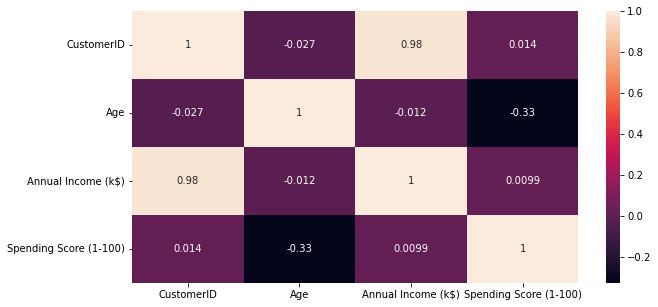

In [24]:
#crete heat map to check the correlation between coloumns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

Create customer gender visualization to show gender distribution across the dataset using bar plot and pie chart.

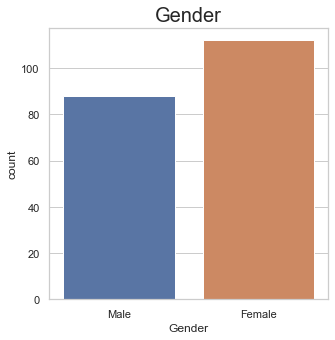

In [50]:
#create bar plot
sns.set_theme(style="whitegrid")
sns.countplot(x=data["Gender"])
plt.title('Gender', fontsize = 20)
plt.show()

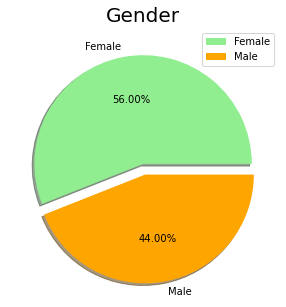

In [39]:
#create pie plot
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
plt.figure(figsize=(10,5))
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True,autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.legend()
plt.show()

Plot a histogram to visualise the distribution of frequencies of customer ages.

Text(0.5, 1.0, 'Age Distribution')

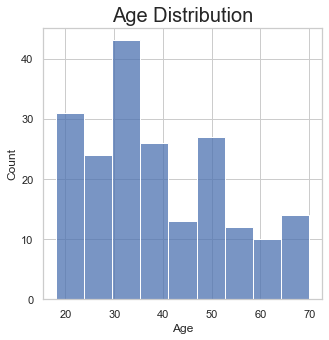

In [63]:
sns.histplot(data=data, x="Age")
plt.title('Age Distribution', fontsize = 20)

Analyze the annual income of customer by plotting a histogram and a density plot.

Text(0.5, 1.0, 'Annual Income')

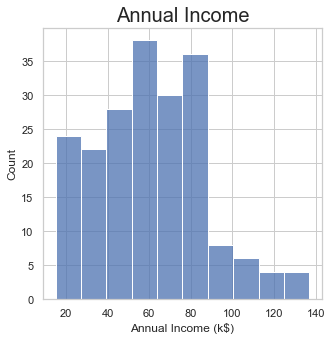

In [65]:
#histogram plot 
sns.histplot(data=data, x="Annual Income (k$)")
plt.title('Annual Income', fontsize = 20)

Text(0.5, 1.0, 'Annual Income')

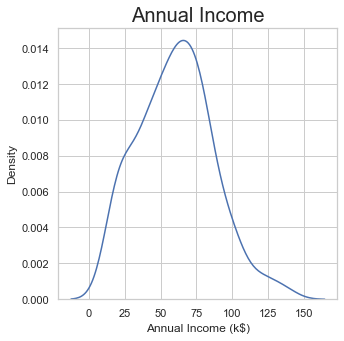

In [68]:
#Density plot
sns.kdeplot(data=data, x="Annual Income (k$)")
plt.title('Annual Income', fontsize = 20)

Text(0.5, 1.0, 'Annual Income')

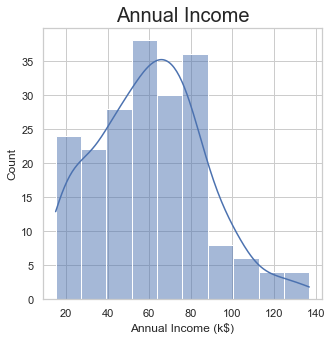

In [64]:
#histogram and density plot
sns.histplot(data=data, x="Annual Income (k$)", kde=True)
plt.title('Annual Income', fontsize = 20)

 Analyze the spending scores of customers and examine the outliers count using a box plot.

Text(0.5, 1.0, 'Spending Score')

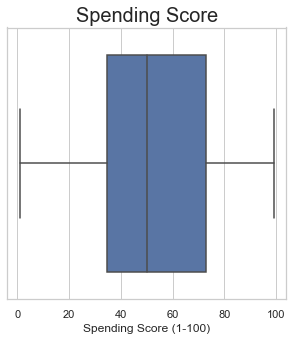

In [70]:
sns.boxplot(data=data, x='Spending Score (1-100)')
plt.title('Spending Score', fontsize = 20)

NO outlier found

 Use K-means clustering and find optimal number of clusters to segment the dataset on the basis of customer spending score and salaries (annual income)

In [71]:
#take just the Annual Income and Spending score
X=data[["Annual Income (k$)","Spending Score (1-100)"]]
#The input data
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


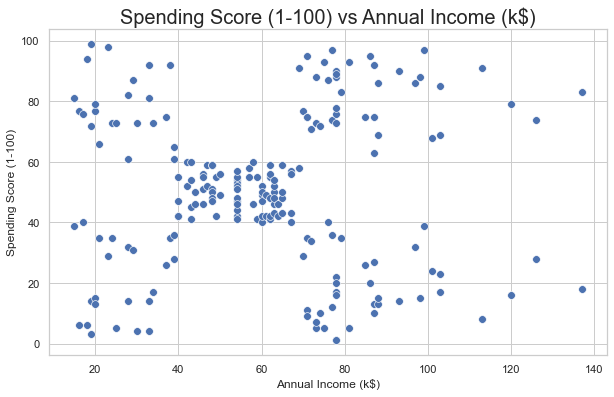

In [73]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)', fontsize = 20)
plt.show()

In [74]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

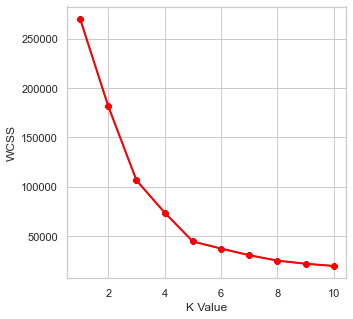

In [80]:
import warnings
warnings.filterwarnings("ignore")
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(5,5))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
#plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [82]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
data["label"] = y
#The new dataframe with the clustering done
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


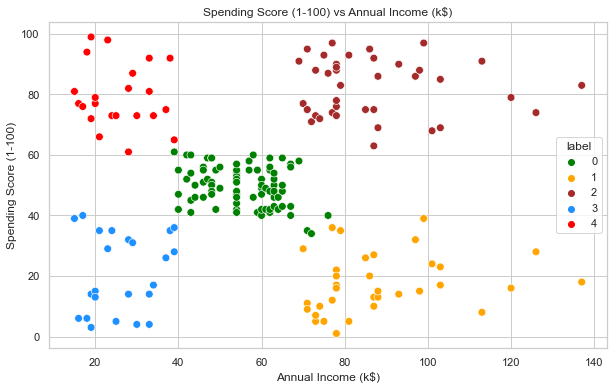

In [84]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = data  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()